# Transformaciones básicas de texto

* *30 min* | Última modificación: Sept 22, 2020

In [1]:
##
## Preparacion de los datos
## 
import pandas as pd

data = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/scopus-abstracts.csv",
    sep=",",
    thousands=None,
    decimal=".",
    encoding="utf-8",
)
data.columns

Index(['DOI', 'Link', 'Abstract'], dtype='object')

In [2]:
##
## Abstracts
##
abstracts = data.Abstract.copy()
abstracts = abstracts.map(lambda w: w[0: w.find("\u00a9")], na_action='ignore')
abstracts[0]

'Mobility is one of the fundamental requirements of human life with significant societal impacts including productivity, economy, social wellbeing, adaptation to a changing climate, and so on. Although human movements follow specific patterns during normal periods, there are limited studies on how such patterns change due to extreme events. To quantify the impacts of an extreme event to human movements, we introduce the concept of mobility resilience which is defined as the ability of a mobility system to manage shocks and return to a steady state in response to an extreme event. We present a method to detect extreme events from geo-located movement data and to measure mobility resilience and transient loss of resilience due to those events. Applying this method, we measure resilience metrics from geo-located social media data for multiple types of disasters occurred all over the world. Quantifying mobility resilience may help us to assess the higher-order socio-economic impacts of ext

## Tokenizers

In [3]:
##
## HTML
##
from urllib import request

url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html = request.urlopen(url).read().decode('utf8')
html[:60]

'<!doctype html public "-//W3C//DTD HTML 4.0 Transitional//EN'

In [4]:
##
## Limpieza del HTML
##
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup

raw = BeautifulSoup(html, 'html.parser').get_text()
tokens = word_tokenize(raw)
tokens[:40]

['BBC',
 'NEWS',
 '|',
 'Health',
 '|',
 'Blondes',
 "'to",
 'die',
 'out',
 'in',
 '200',
 "years'",
 'NEWS',
 'SPORT',
 'WEATHER',
 'WORLD',
 'SERVICE',
 'A-Z',
 'INDEX',
 'SEARCH',
 'You',
 'are',
 'in',
 ':',
 'Health',
 'News',
 'Front',
 'Page',
 'Africa',
 'Americas',
 'Asia-Pacific',
 'Europe',
 'Middle',
 'East',
 'South',
 'Asia',
 'UK',
 'Business',
 'Entertainment',
 'Science/Nature']

In [5]:
##
## Sentence tokenizer
##
import nltk
nltk.download('punkt')

sent_tokenize = nltk.sent_tokenize
abstracts = abstracts.map(lambda w: sent_tokenize(text=w), na_action='ignore')
abstracts[0]

[nltk_data] Downloading package punkt to /Users/jdvelasq/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Mobility is one of the fundamental requirements of human life with significant societal impacts including productivity, economy, social wellbeing, adaptation to a changing climate, and so on.',
 'Although human movements follow specific patterns during normal periods, there are limited studies on how such patterns change due to extreme events.',
 'To quantify the impacts of an extreme event to human movements, we introduce the concept of mobility resilience which is defined as the ability of a mobility system to manage shocks and return to a steady state in response to an extreme event.',
 'We present a method to detect extreme events from geo-located movement data and to measure mobility resilience and transient loss of resilience due to those events.',
 'Applying this method, we measure resilience metrics from geo-located social media data for multiple types of disasters occurred all over the world.',
 'Quantifying mobility resilience may help us to assess the higher-order socio-ec

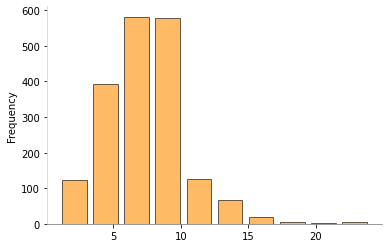

In [6]:
##
## Numero de sentencias por abstract
##
import matplotlib.pyplot as plt

abstracts.map(lambda w: len(w), na_action="ignore").plot.hist(
    color="darkorange", alpha=0.6, rwidth=0.8, edgecolor="k"
)

plt.gca().spines["left"].set_color("lightgray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

In [7]:
##
##  Sentence tokenizer --- Español
##
text_es = """El proceso de leudado de los productos horneados es fundamental para desarrollar sus propiedades de
calidad. El objetivo de este estudio fue evaluar el efecto de diferentes tipos de polvos para hornear en las 
propiedades de calidad de muffins. Se evaluaron las propiedades físico-químicas tanto del batido como del producto 
final. Además de su influencia en las propiedades farinológicas de la harina y las propiedades texturales y 
sensoriales del producto en el almacenamiento. Se encontró la formulación PH16 como la más adecuada, siendo la 
de mayor altura (47.66 ± 0.35 mm), menor contenido de humedad (24.31 ± 0.18 %), menor dureza (12.34 ± 0.34 N) y 
firmeza de miga más baja (1.84 ± 0.01). El comportamiento de la muestra PH16 en almacenamiento y a nivel sensorial 
no tuvo diferencias significativas con la muestra control seleccionada."""

nltk.sent_tokenize(text=text_es, language='spanish')

['El proceso de leudado de los productos horneados es fundamental para desarrollar sus propiedades de\ncalidad.',
 'El objetivo de este estudio fue evaluar el efecto de diferentes tipos de polvos para hornear en las \npropiedades de calidad de muffins.',
 'Se evaluaron las propiedades físico-químicas tanto del batido como del producto \nfinal.',
 'Además de su influencia en las propiedades farinológicas de la harina y las propiedades texturales y \nsensoriales del producto en el almacenamiento.',
 'Se encontró la formulación PH16 como la más adecuada, siendo la \nde mayor altura (47.66 ± 0.35 mm), menor contenido de humedad (24.31 ± 0.18 %), menor dureza (12.34 ± 0.34 N) y \nfirmeza de miga más baja (1.84 ± 0.01).',
 'El comportamiento de la muestra PH16 en almacenamiento y a nivel sensorial \nno tuvo diferencias significativas con la muestra control seleccionada.']

In [8]:
##
## Default word tokenization
##

#
# Se extraen nuevamente los abstracts
#
abstracts = data.Abstract.copy()
abstracts = abstracts.map(lambda w: w[0: w.find("\u00a9")], na_action='ignore')

#
# Default word tokenizer
#  Es una instancia del Treebank word tokenizer
#
default_word_tokenize = nltk.word_tokenize
abstracts.map(default_word_tokenize, na_action='ignore')[0][0:40]

['Mobility',
 'is',
 'one',
 'of',
 'the',
 'fundamental',
 'requirements',
 'of',
 'human',
 'life',
 'with',
 'significant',
 'societal',
 'impacts',
 'including',
 'productivity',
 ',',
 'economy',
 ',',
 'social',
 'wellbeing',
 ',',
 'adaptation',
 'to',
 'a',
 'changing',
 'climate',
 ',',
 'and',
 'so',
 'on',
 '.',
 'Although',
 'human',
 'movements',
 'follow',
 'specific',
 'patterns',
 'during',
 'normal']

In [9]:
##
## TokTok tokenizer
##
from nltk.tokenize.toktok import ToktokTokenizer

# note que no separa los puntos de sentencia intermedios en el parrafo
toktok_word_tokenizer = nltk.ToktokTokenizer()
abstracts.map(toktok_word_tokenizer.tokenize, na_action='ignore')[0][0:40]

['Mobility',
 'is',
 'one',
 'of',
 'the',
 'fundamental',
 'requirements',
 'of',
 'human',
 'life',
 'with',
 'significant',
 'societal',
 'impacts',
 'including',
 'productivity',
 ',',
 'economy',
 ',',
 'social',
 'wellbeing',
 ',',
 'adaptation',
 'to',
 'a',
 'changing',
 'climate',
 ',',
 'and',
 'so',
 'on.',
 'Although',
 'human',
 'movements',
 'follow',
 'specific',
 'patterns',
 'during',
 'normal',
 'periods']

In [10]:
##
## Regexp tokenizer
##
from nltk import RegexpTokenizer

TOKEN_PATTERN = r'\w+'

regex_tokenizer = nltk.RegexpTokenizer(pattern=TOKEN_PATTERN, gaps=False)
abstracts.map(regex_tokenizer.tokenize, na_action='ignore')[0][0:40]

['Mobility',
 'is',
 'one',
 'of',
 'the',
 'fundamental',
 'requirements',
 'of',
 'human',
 'life',
 'with',
 'significant',
 'societal',
 'impacts',
 'including',
 'productivity',
 'economy',
 'social',
 'wellbeing',
 'adaptation',
 'to',
 'a',
 'changing',
 'climate',
 'and',
 'so',
 'on',
 'Although',
 'human',
 'movements',
 'follow',
 'specific',
 'patterns',
 'during',
 'normal',
 'periods',
 'there',
 'are',
 'limited',
 'studies']

In [11]:
##
## Posiciones de los tokens en el texto
##
abstracts.map(lambda w: list(regex_tokenizer.span_tokenize(w)), na_action="ignore")[0][
    0:40
]

[(0, 8),
 (9, 11),
 (12, 15),
 (16, 18),
 (19, 22),
 (23, 34),
 (35, 47),
 (48, 50),
 (51, 56),
 (57, 61),
 (62, 66),
 (67, 78),
 (79, 87),
 (88, 95),
 (96, 105),
 (106, 118),
 (120, 127),
 (129, 135),
 (136, 145),
 (147, 157),
 (158, 160),
 (161, 162),
 (163, 171),
 (172, 179),
 (181, 184),
 (185, 187),
 (188, 190),
 (192, 200),
 (201, 206),
 (207, 216),
 (217, 223),
 (224, 232),
 (233, 241),
 (242, 248),
 (249, 255),
 (256, 263),
 (265, 270),
 (271, 274),
 (275, 282),
 (283, 290)]

In [12]:
##
## Tokenizadores robustos
##
def tokenize_text(text):
    sentences = nltk.sent_tokenize(text)
    word_tokens = [nltk.word_tokenize(sentence) for sentence in sentences]
    return word_tokens

words = abstracts.map(tokenize_text, na_action='ignore')

#
# Dos primeras lineas del primer abstract
#
words[0][0:2]

[['Mobility',
  'is',
  'one',
  'of',
  'the',
  'fundamental',
  'requirements',
  'of',
  'human',
  'life',
  'with',
  'significant',
  'societal',
  'impacts',
  'including',
  'productivity',
  ',',
  'economy',
  ',',
  'social',
  'wellbeing',
  ',',
  'adaptation',
  'to',
  'a',
  'changing',
  'climate',
  ',',
  'and',
  'so',
  'on',
  '.'],
 ['Although',
  'human',
  'movements',
  'follow',
  'specific',
  'patterns',
  'during',
  'normal',
  'periods',
  ',',
  'there',
  'are',
  'limited',
  'studies',
  'on',
  'how',
  'such',
  'patterns',
  'change',
  'due',
  'to',
  'extreme',
  'events',
  '.']]

## Remoción de acentos y caracteres especiales

In [13]:
##
## Remocion de acentos
##
import unicodedata

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('ÁÉÍÓÚÑáéíóúäïöü')

'AEIOUNaeiouaiou'

In [14]:
##
## Remoción de caracterires especiales
## 
import re

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]' 
    text = re.sub(pattern, '', text)
    return text

remove_special_characters("Well this was fun! What do you think? 123#@!", remove_digits=True)

'Well this was fun What do you think '

## Corrección de texto

In [15]:
##
## Correccion de texto --- usando textblob
##     (Otras librerias: PyEnchant, aspell-python)
##
# !pip3 install --user textblob

from textblob import Word

w = Word('fianlly') 
w.correct()

'finally'

In [16]:
# check suggestions 
w.spellcheck()

[('finally', 1.0)]

In [17]:
w = Word('flaot') 
w.spellcheck()

[('flat', 0.85), ('float', 0.15)]

## Stemming

In [18]:
##
## Stemming
##
from nltk.stem import PorterStemmer
ps = PorterStemmer()

ps.stem('jumping'), ps.stem('jumps'), ps.stem('jumped'), ps.stem('lying'), ps.stem('strange')

('jump', 'jump', 'jump', 'lie', 'strang')

In [19]:
from nltk.stem import LancasterStemmer

ls = LancasterStemmer()

ls.stem('jumping'), ls.stem('jumps'), ls.stem('jumped'), ls.stem('lying'), ls.stem('strange')

('jump', 'jump', 'jump', 'lying', 'strange')

In [20]:
from nltk.stem import RegexpStemmer

rs = RegexpStemmer('ing$|s$|ed$', min=4)
rs.stem('jumping'), rs.stem('jumps'), rs.stem('jumped'), rs.stem('lying'), rs.stem('strange')

('jump', 'jump', 'jump', 'ly', 'strange')

In [21]:
from nltk.stem import SnowballStemmer

ss = SnowballStemmer("english")
ss.stem('jumping'), ss.stem('jumps'), ss.stem('jumped'), ss.stem('lying'), ss.stem('strange')

('jump', 'jump', 'jump', 'lie', 'strang')

## Lematizacion

In [22]:
##
## Lemmatization
## 
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

print(wnl.lemmatize('cars'))
print(wnl.lemmatize('men'))
print(wnl.lemmatize('running'))
print(wnl.lemmatize('ate'))
print(wnl.lemmatize('saddest'))
print(wnl.lemmatize('fancier'))
print('----')
print(wnl.lemmatize('cars', 'n'))  # n --> nouns
print(wnl.lemmatize('men', 'n'))
print(wnl.lemmatize('running', 'v')) # v --> verbs
print(wnl.lemmatize('ate', 'v'))
print(wnl.lemmatize('saddest', 'a')) # --> adjectves
print(wnl.lemmatize('fancier', 'a'))

car
men
running
ate
saddest
fancier
----
car
men
run
eat
sad
fancy


In [23]:
##
## spaCy hace la lematizaction basado en speech tagging
##   !pip3 install spacy
##   !python3 -m spacy download en_core_web_sm
##
import spacy

nlp = spacy.load('en_core_web_sm')
text = 'My system keeps crashing his crashed yesterday, ours crashes daily'

def lemmatize_text(text): 
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'My system keep crash ! his crash yesterday , ours crash daily'

## Esquema basico

In [24]:
##
## Clean html
##
from bs4 import BeautifulSoup

# captura
url = "http://news.bbc.co.uk/2/hi/health/2284783.stm"
html = request.urlopen(url).read().decode('utf8')

# se remueven las etiquetas

raw = BeautifulSoup(html, 'html.parser').get_text()

# tokenizer
tokens = nltk.wordpunct_tokenize(raw)

# tokens --> text
text = nltk.Text(tokens)

# normalizacion
#  remocion de puntuacion, acentos, numeros, puntuacion, ....
words = [w.lower() for w in text]

# vocabulario
sorted(set(words))[:20]

['"',
 "'",
 ',',
 ',"',
 '-',
 '-------------',
 '----------------------------------------------------------------------------------',
 '.',
 '."',
 '/',
 '01',
 '02',
 '09',
 '11',
 '12',
 '17',
 '200',
 '2002',
 '2202',
 '27']